In [1]:
%matplotlib inline

# Dependencies and setup

import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import scipy.stats as sts

In [2]:
# loading csv files and assigning to variables

city_data_to_load = "Resources/city_data.csv"

ride_data_to_load = "Resources/ride_data.csv"

# Reading csv files into Pandas:
city_data_df = pd.read_csv(city_data_to_load)

city_data_df.head(10)



,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [3]:
# Reading ride csv file into Pandas and examining the head

ride_data_df = pd.read_csv(ride_data_to_load)

ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


# Inspecting the city_data_df

## Do the following:

1. Get all the rows that contain null values
2. Make sure the driver_count column has an integer as data type
3. Find out how many data points there are for each type of city

In [4]:
# finding rows that contain null values
# can use the df.count()
# can also use the df.isnull().sum() method chaining
# Note that you get a consistent value here

city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [5]:
# ensuring there are no null values"
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
# checking the data type of the driver_count column using dtypes

city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
# finding the amt of data points for each type of city
# can use the sum() methodn on the city_data_df
# can also use the unique() method on a specific column

city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
# now using the sum() method on the city_data_df for the type col where conditional is Urban, Suburban, or Rural

sum(city_data_df["type"] == "Urban")

66

In [9]:
sum(city_data_df["type"]=="Rural")

18

In [10]:
sum(city_data_df["type"]=="Suburban")

36

# Inspecting the Ride Data DataFrame:

## Need the following information:

1. Get all the rows that contain null values
2. Make sure the fare and ride_id col are numerical data types.

In [11]:
# Getting the col and rows that are not null
# Note that you get a consistent value here

ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
# determining if any are null:

ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [13]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

# Merging the DataFrames

## Reviewing each DataFrame:

- city_data_df has these col:
    - city
    - driver_count
    - type
    
- ride_data_df has these col:
    - city
    - date
    - fare
    - ride_id

- Recall that when you merge DataFrames, you merge on the col with the same data and the same col name in both DataFrames using this syntax:
    - new_df = pd.merge(leftdf, rightdf, on=["col_leftdf", "col_rightdf"])
    - may need to merge DataFrames using the how parameter (eith left, right, inner, or outer) depending on how we want to merge the DataFrames
        - note that the default for how is inner
        
- In this example, both have the city col
    - merge on city col an dadd city_data_df to the end of the ride_data_df with the constraint how="left"

In [14]:
# merging the DataFrames

pyber_data_df = pd.merge(ride_data_df, city_data_df, on=["city"], how="left")

# displaying the DataFrame

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


# Some notes on Bubble Charts/Scatter Plots

- scatter plot/scatter chart/bubble chart/bubble plot are often used interchangeable in data vis.

## Creating Bubble Chart for PyBer:

1. Average fare for each type of city on y-axis
2. Total number of rides for each type of city on the x-axis
3. Make the bubble size correlate with the number of drivers for each city

### Steps to follow:

1. Can use Pandas mean() for each city in the "fare" col.
2. Get total number of rides for each city  using Pandas count() for each city in ride_id col.
3. Make bubble size correlate with number of drivers, get average driver_count for each city.

- It is more efficient to complete above steps by creating separate DataFrames for each type and then create a Data Series for each step.

In [15]:
# Creating a DataFrame for each urban cities

urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]

urban_cities_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban


In [16]:
# Creating DataFrames for Rural and Suburban cities:

rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]

suburb_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]


In [17]:
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [18]:
# efficient way to get the number of rides for each city in each city type is to create a Series
# index will be the name of the city and col will be the number of rides.
# create a Data Series can use the groupby() function and add the col inside the parentheses
# groupby() is good for grouping large amounts of data when we want to compute math on these groups.
# here, apply the groupby() function to create the DataSeries and apply count() for ride_id to get number of rides

urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]

urban_ride_count.head()


city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [19]:
# Creating the rural ride count Series

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

# Creating the suburban ride count Series

suburb_ride_count = suburb_cities_df.groupby(["city"]).count()["ride_id"]


In [20]:
# Calculating the mean for the y-axis for urban city type:

urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]

urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [21]:
# Calculating the mean for the suburban and rural city types

rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

suburb_avg_fare = suburb_cities_df.groupby(["city"]).mean()["fare"]

In [22]:
# Getting the average number of drivers for each city type

urban_avg_driver = urban_cities_df.groupby(["city"]).mean()["driver_count"]

rural_avg_driver = rural_cities_df.groupby(["city"]).mean()["driver_count"]

suburb_avg_driver = suburb_cities_df.groupby(["city"]).mean()["driver_count"]

urban_avg_driver.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

## Creating the Scatter Plot

- Needs to meet these condidtions:
    1. x-axis is the number of rides/city
    2. y-axis is average fare
    3. Size of the bubble corresponds to average number of drivers.
    
- Create each scatter plot (rural, urban, suburban) individually and then combine.

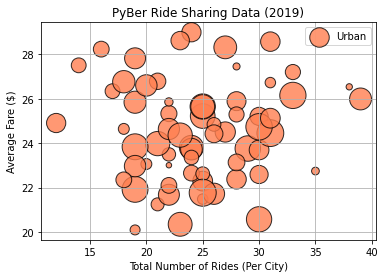

In [23]:
# Creating the urban scatter plot

plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_avg_driver, c="coral",
           edgecolors="black", linewidths=1,
           alpha=0.8, label="Urban")

plt.title("PyBer Ride Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()


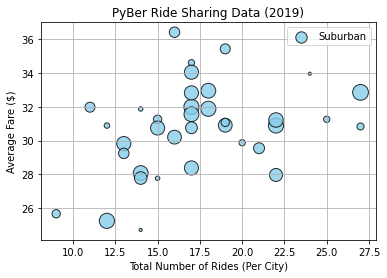

In [24]:
# Build the scatter plot for the suburbs

plt.scatter(suburb_ride_count,
           suburb_avg_fare,
           s=10*suburb_avg_driver, c="skyblue",
           edgecolors="black", linewidths=1,
           alpha=0.8, label="Suburban")

plt.title("PyBer Ride Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

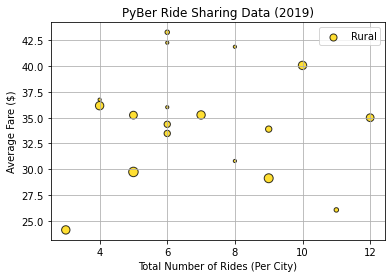

In [25]:
# Creating the Rural Scatter plot

plt.scatter(rural_ride_count,
            rural_avg_fare,
           s=10*rural_avg_driver, c="gold",
           edgecolors="black", linewidths=1,
           alpha=0.8, label="Rural")

plt.title("PyBer Ride Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

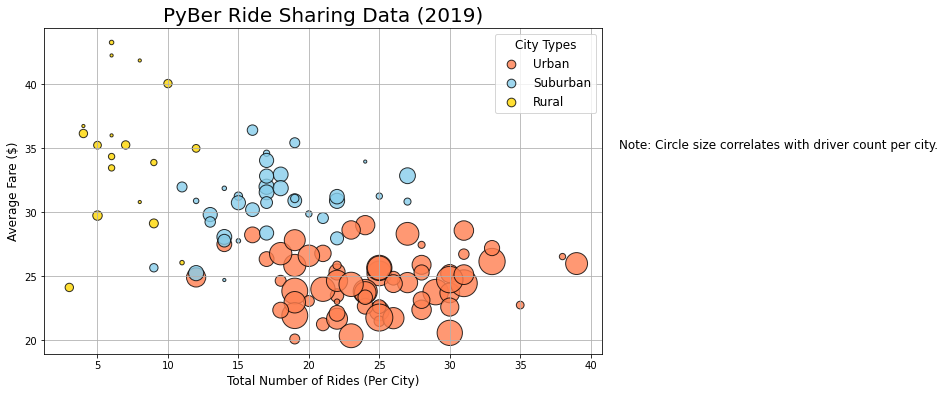

In [26]:
# Combining the scatter plots into one
# add three plt.scatter() function for each chart to one cell"

# changing the figure size:
plt.subplots(figsize=(10,6))

# urban scatter:
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_avg_driver, c="coral",
           edgecolors="black", linewidths=1,
           alpha=0.8, label="Urban")

#suburban scatter:
plt.scatter(suburb_ride_count,
           suburb_avg_fare,
           s=10*suburb_avg_driver, c="skyblue",
           edgecolors="black", linewidths=1,
           alpha=0.8, label="Suburban")

# rural scatter:
plt.scatter(rural_ride_count,
            rural_avg_fare,
           s=10*rural_avg_driver, c="gold",
           edgecolors="black", linewidths=1,
           alpha=0.8, label="Rural")

# incorporating other graph properties:
# note the fontsize parameter
plt.title("PyBer Ride Sharing Data (2019)", fontsize = 20)
plt.ylabel("Average Fare ($)", fontsize = 12)
plt.xlabel("Total Number of Rides (Per City)", fontsize = 12)
plt.grid(True)

# just running plt.legend() creates markers that are different sizes
# Need to customize the legend
# declare a variable for the legend function, add param. for font size, legend loc., leg. title, etc
# after declaring the var. for legend, can use legendHandles[]._sizes to set font size of marker
    # inside the brackets add the list element for the number of markers in the legend
    
lgnd = plt.legend(fontsize="12", mode="Expanded",
                 scatterpoints=1, loc="best", title="City Types")

lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

lgnd.get_title().set_fontsize(12)
# Show plot

plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize=12)

plt.savefig("analysis/Fig1.png")
plt.show()

## Notes on the above block of code

- By adding each plot within the one cell, you are able to combine each of the scatter plots into one. 
    - add each plt.scatter() with the parameters for each
    - Then you add the other elements (title, legend, grid, etc.)

- The plt.legend() section is interesting because it highlights the various parameters available:
    - you can change the fontsize, and it takes a string
    - the mode here expands the legend horizontally with "Expanded"
    - scatterpoints tells it how many scatter points in the legend for each marker
    - location can be set using loc and here using "best" places it for the best location based on the plotted data points
    - adding a legend title
    - Set the size of the marker equal to 75 pt font by using the legendHandles[]._sizes attribute and list indexing in the brackets
        - each marker corresponds to an index.
    - increase fontsize to 12 for the title
    
- Adding a note to the plot to describe the size of the bubbles:
    - use the plt.text()
        - takes the x,y coordinates first: here, based on our x and y axes. (Set x=42 because know it will be outside of the plot.
        - Then, adding the text of the note
        - Followed by the fontsize
        
- Finally, you can save the figure using the plt.savefig()
    - argument is a string of the path you want to save the fiel with the file name and file type
    
- Documentation on these methods/functions:
    1. [Matplotlib doc on legend](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)
    2. [Matplotlib doc on legend axes.Axes](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html)
    3. [Matplotlib doc on plt.text()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html)

# Descriptive Statistics

Descriptive statistics can help understand the central tendency of the data. Measures of central tendency include the mean, median, and mode.

Descriptive statistics can also include the standard deviation, the min and max values and the quartiles.

- There are 3 methods for finding this information:
    1. Pandas .describe()
        - Convenient and provides the high level summary stats on a DataFrame (i.e. mean, median, mode, stdev, max, min, quartiles)
    2. Pandas mean(), median(), and mode() functions used on a Series
    3. The NumPy mean() and median() and the SciPy mode() function on a Series.
    
Here working through all 3:

In [27]:
# Using the Pandas describe() function on the urban, rural, and suburban DataFrames

urban_cities_df.describe()



,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [28]:
# Using the Pandas desribe() on the suburban DataFrame:

suburb_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [29]:
# Using the Pandas describe() on the rural DataFrame

rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [30]:
# Calculating summary statistics on the ride count for each city type using Pandas describe():

urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [31]:
suburb_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [32]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [33]:
# If you want only the mean w/o the other summary stats, you can use the Pandas mean() 
# note the Python round() used with mean()
# Also note the way you can bring all of these together into a tuple by separating each w/ a comma

round(urban_ride_count.mean(),2), round(suburb_ride_count.mean(), 2), round(rural_ride_count.mean(), 2)

(24.62, 17.36, 6.94)

In [34]:
# finding the meadian in the same way as above using the Pandas median()

round(urban_ride_count.median(), 2), round(suburb_ride_count.median(), 2), round(rural_ride_count.median(), 2)

(24.0, 17.0, 6.0)

In [35]:
# finding the mode on the urban_ride_count using the Pandas mode():
# Note that there are 2 modes -- one at 22 and one at 25

urban_ride_count.mode()

0    22
1    25
dtype: int64

In [36]:
suburb_ride_count.mode()

0    17
dtype: int64

In [37]:
# Using numpy and scipy statistics modules to calculate mean and median 
# Important because there may be times when you need to calculate these measures outside jupyter notebook
# requires importing numpy and scipy.stats

# finding the measures of central tendency on the ride count and printing the finding:

# using np.mean() on the urban_ride_count and assigning to new var.
mean_urban_ride_count = np.mean(urban_ride_count)

# print statement using f string

print(f"The mean ride counts for urban trips is {mean_urban_ride_count:.2f}. ")

# using np.median on urban_ride_count and assigning to a new var.

median_urban_ride_count = np.median(urban_ride_count)

# print statement using f-string

print(f"The median for the ride counts for urban trips is {median_urban_ride_count}. ")

# finding the mode using sts.mode() SciPy module
# Note that this method of finding the mode returns both the mode and the number of times it appears.
mode_urban_ride_count = sts.mode(urban_ride_count)

# print statement using f-string

print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}. ")

The mean ride counts for urban trips is 24.62. 
The median for the ride counts for urban trips is 24.0. 
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])). 


In [38]:
mode_suburb_ride_count = sts.mode(suburb_ride_count)

print(mode_suburb_ride_count)

ModeResult(mode=array([17]), count=array([7]))


In [39]:
mode_rural_ride_count = sts.mode(rural_ride_count)

print(mode_rural_ride_count)

ModeResult(mode=array([6]), count=array([5]))


In [40]:
# Calculating the summary stats of the average fare for each city type.
# Note that the urban_avg_fare calculates the average fare for each city.
# Now you are grabbing the average fare for each city TYPE
# Begin by getting the fare from the urban_cities_df

urban_fares = urban_cities_df["fare"]

urban_fares.head()


0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [41]:
# Calculating the mean using np.mean()
mean_urban_fares = np.mean(urban_fares)

# Print finding
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}." )

# Calculating the median using the np.median()

median_urban_fares = np.median(urban_fares)

#Print the finding
print(f"The median fare price for urban trips is ${median_urban_fares}." )

# Calculating mode of urban fares using sts.mode()
mode_urban_fares = sts.mode(urban_fares)

#Print finding

print(f"The mode fare price for urban trips is {mode_urban_fares}." )

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [42]:
# Repeating the same process for each city type:

suburb_fares = suburb_cities_df["fare"]

mean_suburb_fare = np.mean(suburb_fares)

median_surburb_fare = np.median(suburb_fares)

mode_suburb_fare = sts.mode(suburb_fares)

print(f'The mean fare for surburban trips is ${mean_suburb_fare:.2f}.')
      
rural_fares = rural_cities_df["fare"]
      
mean_rural_fare = np.mean(rural_fares)

median_rural_fare = np.median(rural_fares)

mode_rural_fare = sts.mode(rural_fares)

print(f'The mean fare for rural trips is ${mean_rural_fare:.2f}.')

print(f'The mean fare for urban trips is $ {mean_urban_fares:.2f}.')
      


The mean fare for surburban trips is $30.97.
The mean fare for rural trips is $34.62.
The mean fare for urban trips is $ 24.53.


In [43]:
# calculating summary statitistic for number of drivers for each city type

# Creating a Series for each:
urban_drivers = urban_cities_df["driver_count"]

rural_drivers = rural_cities_df["driver_count"]

suburb_drivers = suburb_cities_df["driver_count"]



In [44]:
# Calculating the mean, median and mode for each urban driver Series created above

urban_drivers_mean = np.mean(urban_drivers)

urban_drivers_median = np.median(urban_drivers)

urban_drivers_mode = sts.mode(urban_drivers)

# Calculating the mean, median and mode for each rural driver Series created above

rural_drivers_mean = np.mean(rural_drivers)

rural_drivers_median = np.median(rural_drivers)

rural_drivers_mode = sts.mode(rural_drivers)

# Calculating the mean, median and mode for each suburban driver Series created above

suburb_drivers_mean = np.mean(suburb_drivers)

suburb_drivers_median = np.median(suburb_drivers)

suburb_drivers_mode = sts.mode(suburb_drivers)

print(f'The mean drivers in a suburb is {suburb_drivers_mean:.0f}')

The mean drivers in a suburb is 14


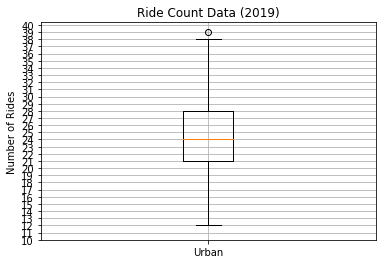

In [45]:
# Creating a box-and-whisker plot requires the ax.boxplot(), which takes an array inside the ()
# Can also add title and axes labels, as before
# Creating a box-and-whisker plot for urban_ride_count

# creating a 
x_labels = ["Urban"]

fig, ax = plt.subplots()

ax.boxplot(urban_ride_count, labels=x_labels)

# Add y label and grid

ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10, 41, step=1.0))

ax.grid()
plt.show()

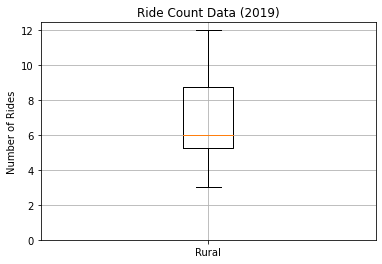

In [46]:
x_labels = ["Rural"]

fig, ax = plt.subplots()

ax.boxplot(rural_ride_count, labels=x_labels)

ax.set_title("Ride Count Data (2019)")

ax.set_ylabel("Number of Rides")

ax.set_yticks(np.arange(0, 14, step=2.0))

ax.grid()
plt.show()

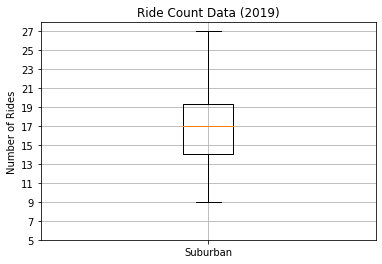

In [47]:
x_labels = ["Suburban"]

fig, ax = plt.subplots()

ax.boxplot(suburb_ride_count, labels=x_labels)

ax.set_title("Ride Count Data (2019)")

ax.set_ylabel("Number of Rides")

ax.set_yticks(np.arange(5, 28, step=2.0))

ax.grid()
plt.show()

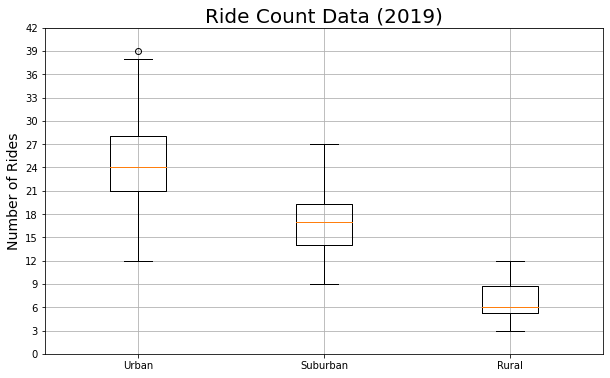

In [48]:
# Adding all of the box plots to one graph

x_labels = ["Urban", "Suburban", "Rural"]

ride_count_data = [urban_ride_count, suburb_ride_count, rural_ride_count]

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title("Ride Count Data (2019)", fontsize=20)

ax.set_ylabel("Number of Rides", fontsize = 14)

ax.boxplot(ride_count_data, labels=x_labels)

ax.set_yticks(np.arange(0, 45, step=3.0))

ax.grid()

plt.savefig("analysis/Fig2.png")

plt.show()

In [49]:
# Note that there is an outlier of 39
# Now looking to see which city has the highest number of riders.
# Recall that the urban_ride_count is a Series with the Index being the city and the data is the number of rides.

# Can get the "True" values where urban_ride_count is 39
# Then filter urban_ride_count for all the urban_ride_count for all of the True values and get the city name

# Here, filtering the urban_ride_count Series for 39 and then looking at the value with .index[0] 
# Then assign to urban_city_outlier
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]

print(f'{urban_city_outlier} has the highest rider count')


West Angela has the highest rider count


Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

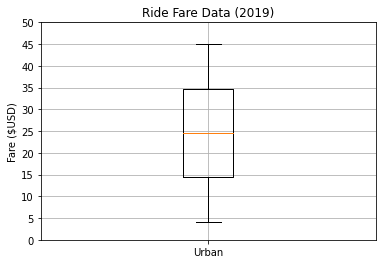

In [51]:
# Making a box-and-whisker plot for the Ride Fare Data

# urban fare box-and-whisker

x_labels = ["Urban"]

fig, ax = plt.subplots()

ax.boxplot(urban_fares, labels=x_labels)

# adding title, y-axis, and grid

ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show
print("Summary Statistics")

urban_fares.describe()

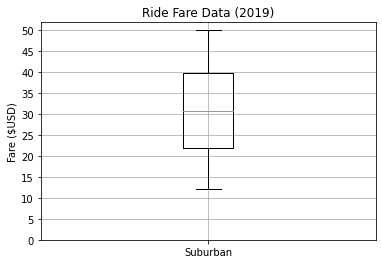

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [53]:
# doing the same as above for the suburban fares

x_labels = ["Suburban"]

fig, ax = plt.subplots()

ax.boxplot(suburb_fares, labels=x_labels)

ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print('Summary Statistics')
suburb_fares.describe()

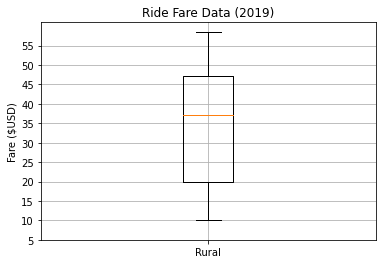

Summar Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [54]:
# Doing the same as above for the rural fares

x_labels = ["Rural"]

fig, ax = plt.subplots()

ax.boxplot(rural_fares, labels=x_labels)
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(5, 56, step=5.0))
ax.grid()
plt.show()
print('Summar Statistics')
rural_fares.describe()

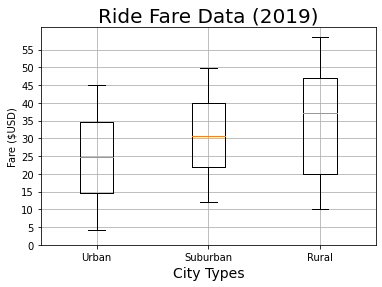

In [56]:
# combining the box plots

x_labels = ["Urban", "Suburban", "Rural"]

fare_data = [urban_fares, suburb_fares, rural_fares]

fig, ax = plt.subplots()

ax.boxplot(fare_data, labels = x_labels)

ax.set_title("Ride Fare Data (2019)", fontsize=20)

ax.set_ylabel("Fare ($USD)")

ax.set_xlabel("City Types", fontsize=14)

ax.set_yticks(np.arange(0, 56, step=5.0))

ax.grid()
plt.show()


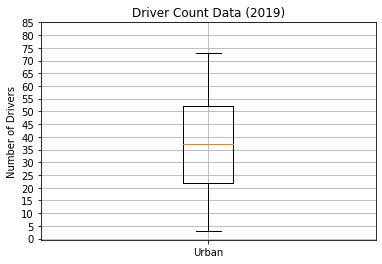

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [58]:
# Now creating box plots for the driver count data with summary statistics.

# Urban driver count box plot

x_labels = ["Urban"]

fig, ax = plt.subplots()

ax.boxplot(urban_drivers, labels=x_labels)

ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

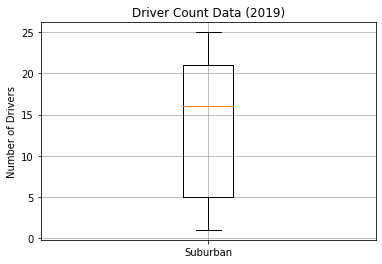

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [61]:
# Creating the suburb driver box plot

x_labels = ["Suburban"]

fig, ax = plt.subplots()

ax.boxplot(suburb_drivers, labels=x_labels)

ax.set_title("Driver Count Data (2019)")

ax.set_ylabel("Number of Drivers")

ax.set_yticks(np.arange(0, 26, step=5.0))

ax.grid()

plt.show()

print('Summary Statistics')

suburb_drivers.describe()

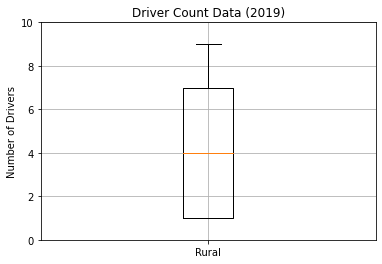

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [62]:
# doing the same as above with rural drivers

x_labels = ["Rural"]

fig, ax = plt.subplots()

ax.boxplot(rural_drivers, labels=x_labels)

ax.set_title("Driver Count Data (2019)")

ax.set_ylabel("Number of Drivers")

ax.set_yticks(np.arange(0, 12, step=2.0))

ax.grid()

plt.show()

print("Summary Statistics")

rural_drivers.describe()

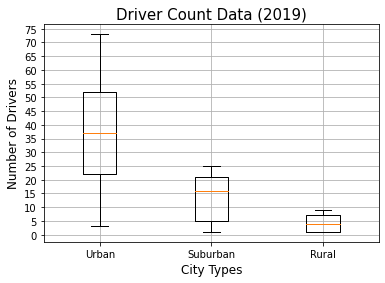

In [65]:
# bringing them all together

x_labels = ["Urban", "Suburban", "Rural"]

driver_data = [urban_drivers, suburb_drivers, rural_drivers]

fig, ax = plt.subplots()

ax.boxplot(driver_data, labels=x_labels)

ax.set_title("Driver Count Data (2019)", fontsize=15)

ax.set_ylabel("Number of Drivers", fontsize=12)

ax.set_yticks(np.arange(0, 76, step=5.0))

ax.set_xlabel("City Types", fontsize=12)

ax.grid()

plt.show()

# Documentation for Box Plots and Stats Vis

[Matplotlib doc for stats vis](https://matplotlib.org/stable/gallery/index.html#statistics)

[Matplotlib doc for box plots](https://matplotlib.org/examples/statistics/boxplot_demo.html)